In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

In [9]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [10]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [11]:
species["conservation_status"].value_counts(dropna=False)

conservation_status
NaN                   5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64

In [12]:
species["is_protected"] = species["conservation_status"].notna()

In [13]:
species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,False
1,Mammal,Bos bison,"American Bison, Bison",NaN,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN,False


In [18]:
category_counts = (
    species
    .groupby(["category", "is_protected"])["scientific_name"]
    .nunique()
    .reset_index(name="species_count")
)
category_counts

,category,is_protected,species_count
0,Amphibian,False,72
1,Amphibian,True,7
2,Bird,False,413
3,Bird,True,75
4,Fish,False,115
5,Fish,True,11
6,Mammal,False,146
7,Mammal,True,30
8,Nonvascular Plant,False,328
9,Nonvascular Plant,True,5


In [22]:
category_pivot = category_counts.pivot(
    index="category",
    columns="is_protected",
    values="species_count"
).fillna(0)

category_pivot["total"] = category_pivot[False] + category_pivot[True]
category_pivot["protected_pct"] = (category_pivot[True] / category_pivot["total"]) * 100

category_pivot.sort_values("protected_pct", ascending=False)

is_protected,False,True,total,protected_pct
category,,,,
Mammal,146,30,176,17.045455
Bird,413,75,488,15.368852
Amphibian,72,7,79,8.860759
Fish,115,11,126,8.730159
Reptile,73,5,78,6.410256
Nonvascular Plant,328,5,333,1.501502
Vascular Plant,4216,46,4262,1.079305


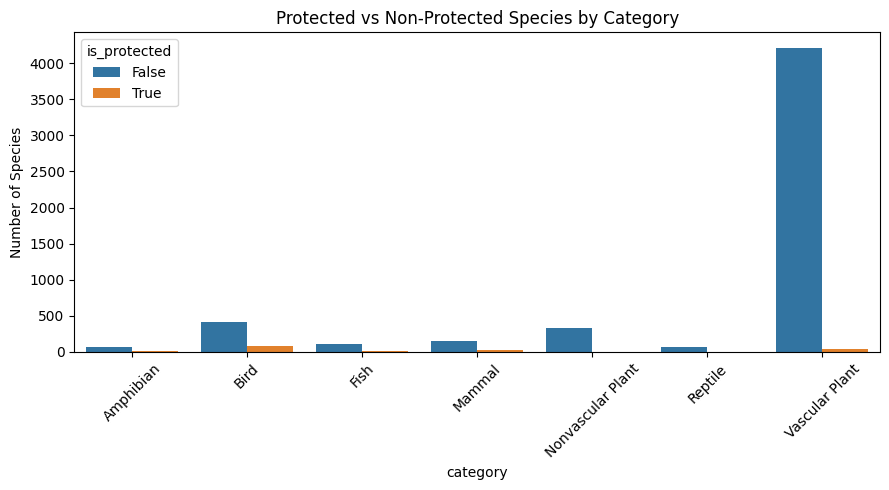

In [23]:
plt.figure(figsize=(9,5))
sns.barplot(data=category_counts, x="category", y="species_count", hue="is_protected")
plt.xticks(rotation=45)
plt.ylabel("Number of Species")
plt.title("Protected vs Non-Protected Species by Category")
plt.tight_layout()
plt.show()

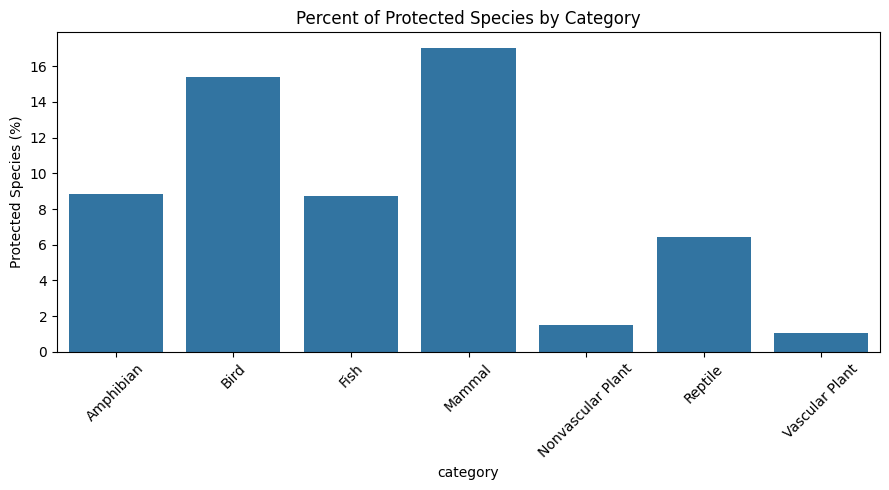

In [21]:
plt.figure(figsize=(9,5))
sns.barplot(x=category_pivot.index, y=category_pivot["protected_pct"].values)
plt.xticks(rotation=45)
plt.ylabel("Protected Species (%)")
plt.title("Percent of Protected Species by Category")
plt.tight_layout()
plt.show()

## Conclusions

In this project, I explored biodiversity data from the National Parks Service to identify patterns in species conservation status.

I learned how to work with real-world datasets, perform grouping and aggregation, and use visualizations to compare categories. Creating derived variables, such as whether a species is protected, helped uncover meaningful differences between groups.

The analysis showed that mammals and birds have the highest proportion of protected species, while plant categories have significantly lower protection rates. This result was expected, as conservation efforts are often more focused on animal species.

Overall, the findings suggest that conservation status varies notably across species categories, highlighting potential gaps in protection.


## Következtetések

Ebben a projektben a Nemzeti Park Szolgálat biodiverzitási adatait elemeztem, hogy mintázatokat találjak a fajok védettségi státuszában.

A munka során megtanultam valós adathalmazokkal dolgozni, adatokat csoportosítani és aggregálni, valamint vizualizációk segítségével kategóriákat összehasonlítani. Az olyan származtatott változók létrehozása, mint a faj védettsége, segített az adatok mélyebb megértésében.

Az elemzés alapján az emlősök és a madarak esetében a legmagasabb a védett fajok aránya, míg a növénycsoportoknál ez az arány jóval alacsonyabb. Ez összhangban van azzal, hogy a természetvédelem gyakran inkább az állatfajokra koncentrál.

Összességében az eredmények azt mutatják, hogy a védettség mértéke jelentősen eltér a különböző fajkategóriák között, ami további védelmi lehetőségekre utalhat.